# Linear Regression on Toy Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

In [2]:
def one_dim_function(N, sigma):
    """Sample N points uniformly from the interval [-1,3],
    add random noise, and output the function y = 3x + 1

    Parameters
    ----------
    N : int
        The number of points
    sigma : float
        The standard deviation of noise to add to the randomly generated 
        points.

    Returns
    -------
    x, y (list, list) 
        x, the randomly generated points with added noise
        y, the function evaluated at these points.
    """
    x = np.random.uniform(low=-1.0, high=3.0, size=N)
    y = 3*x + 1
    y = y + np.random.normal(0, sigma, size=N)
    
    return x, y

### Simple Linear Regression by normal equation

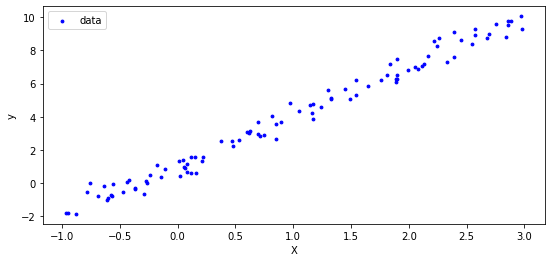

In [3]:
N = 100
sigma = 0.4
X, y = one_dim_function(N, sigma)

plt.figure(figsize=(9,4))
plt.scatter(X, y, c="blue", s=8)
plt.xlabel("X")
plt.ylabel("y")
plt.legend(["data"])
plt.show()

In [4]:
# Column stack to create model matrix
X_m = np.c_[np.ones((100,1)), X]
betas = np.linalg.inv(X_m.T @ X_m) @ X_m.T @ y
print(betas)

[1.04723603 2.98335642]


In [5]:
# Making new predictions
X_test = np.array([np.min(X), np.max(X)])
X_m_test = np.c_[np.ones((2,1)), X_test]
y_test = X_m_test @ betas
y_test

array([-1.83992972,  9.94671897])

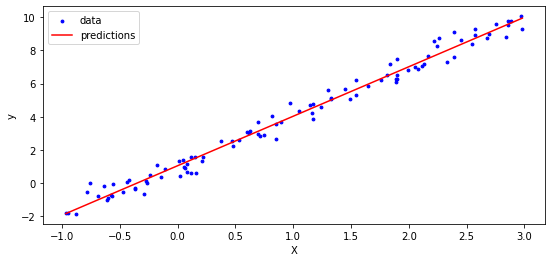

In [6]:
plt.figure(figsize=(9,4))
plt.scatter(X, y, c="blue", s=8)
plt.plot(X_test, y_test, c="r")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(["data", "predictions"])
plt.show()

In [7]:
y_pred = X_m @ betas
MSE = np.mean((y - y_pred)**2)
RMSE = np.sqrt(MSE)
MAE = np.mean(np.abs(y - y_pred))
R2 = 1 - (MSE) / (np.mean((y - np.mean(y))**2))
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-squared:", R2)

MSE: 0.19918466311326824
RMSE: 0.4463010901995067
MAE: 0.35512752046298
R-squared: 0.983512740754473


### Simple Linear Regression with Skicit-Learn

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y)
print("Intercept:", lin_reg.intercept_)
print("Weights:", lin_reg.coef_)

Intercept: 1.0472360306920607
Weights: [2.98335642]


In [10]:
lin_reg.predict(X_test.reshape(-1, 1))

array([-1.83992972,  9.94671897])

In [11]:
y_pred = lin_reg.predict(X.reshape(-1, 1))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MAE:", mean_absolute_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

MSE: 0.1991846631132682
RMSE: 0.4463010901995067
MAE: 0.3551275204629799
R-squared: 0.983512740754473
